In [117]:
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn import preprocessing
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from keras.layers import Dense
from keras import Sequential

import pandas as pd

In [118]:
# finestra di selezione e apertura del dataset
Tk().withdraw()
filename = askopenfilename()
if "rover_a" in filename or "rover_b" in filename:
    DATASET = "ROVER"
else:
    DATASET = "AKRON"

In [119]:
WITH_TIME = False

dataset = pd.read_csv(filename, header=0)
# trasformo il tempo da datetime a time-stamp, ovvero in secondi
dataset["TIME_STAMP"] = dataset["TIME_STAMP"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f").timestamp())
# dare in pasto il tempo oppure no alla rete
if not WITH_TIME:
    dataset.set_index("TIME_STAMP", inplace=True)
if DATASET == "AKRON":
    # dare in pasto alla rete l'emergenza dispositivo inserito oppure no
    WITH_BAD_EMERG = True
    if not WITH_BAD_EMERG:
        for index, row in dataset.iterrows():
            if "Dispositivo di emergenza inserito (GE0E16)" in row[4]:
                dataset.drop(index, axis=0, inplace=True)
    # trasformo i valori categorici (classi delle emergenze) in valori numerici (5 classi -> valori [0,1,2,3,4])
    dataset["ST_MACH_EMERG_DESC"] = preprocessing.LabelEncoder().fit_transform(dataset["ST_MACH_EMERG_DESC"])
    #sposto la colonna delle classi al fondo
    dataset = dataset[[c for c in dataset if c not in ["ST_MACH_EMERG_DESC"]] + ["ST_MACH_EMERG_DESC"]]
else:
    # trasformo i valori categorici in valori numerici (5 classi -> valori [0,1,2,3,4])
    dataset["TOOL"] = preprocessing.LabelEncoder().fit_transform(dataset["TOOL"])
    dataset["NAME"] = preprocessing.LabelEncoder().fit_transform(dataset["NAME"])
    #sposto la colonna delle classi al fondo
    dataset = dataset[[c for c in dataset if c not in ["MACC_EME"]] + ["MACC_EME"]]

dataset

,METRI_LAVORATI_PARZ,METRI_LAVORATI_TOT,NUM_PASSAGGI_PARZ,NUM_PASSAGGI_TOT,ST_MACH_FULL,ST_MACH_ON,ST_MACH_POT,ST_MACH_STANDBY,ST_MACH_WORK,TEMP_LAMPADA_IRL,TEMP_RULLO_EVA,TEMP_RULLO_PU,TEMP_VASCA_EVA,TEMP_VASCA_PU,VELOCITA_CG,ST_MACH_EMERG_DESC
TIME_STAMP,,,,,,,,,,,,,,,,
1.656491e+09,0,3148,0,5182,0,1,1,1,0,28,69,69,70,70,0,5
1.656491e+09,0,3148,0,5182,0,1,1,1,0,28,88,88,91,91,0,5
1.656491e+09,0,3148,0,5182,0,1,1,1,0,28,105,105,109,109,0,0
1.656491e+09,0,3148,0,5182,0,1,1,1,0,28,118,118,124,124,0,0
1.656491e+09,0,3148,0,5182,0,1,1,1,0,29,130,130,138,138,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.658157e+09,0,3621,0,5789,0,1,1,1,0,36,40,40,39,39,0,4
1.658157e+09,0,3621,0,5789,0,1,1,1,0,36,40,40,39,39,0,4
1.658157e+09,0,3621,0,5789,0,1,1,1,0,36,40,40,39,39,0,4


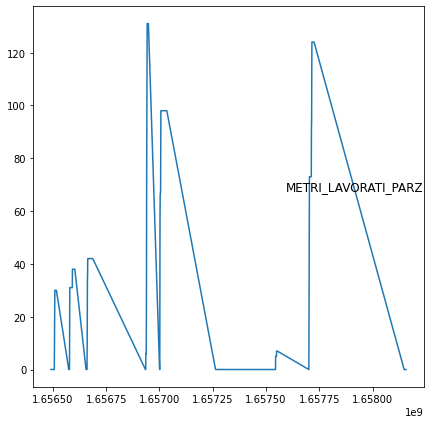

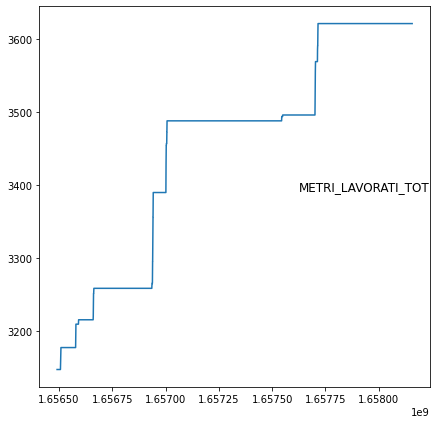

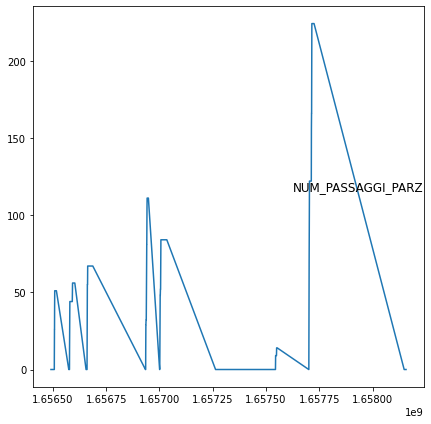

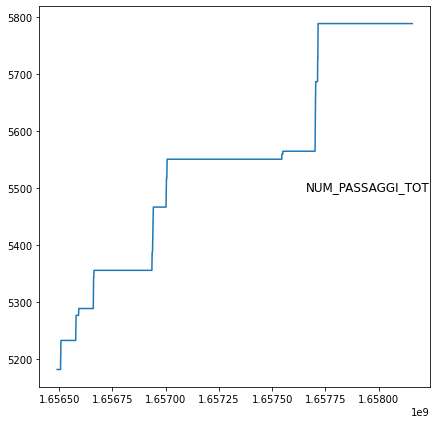

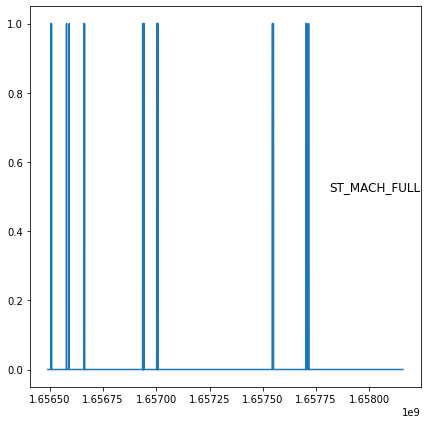

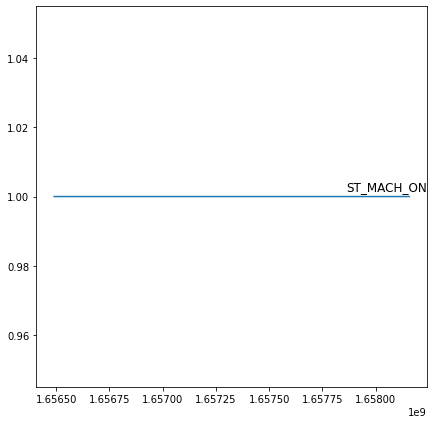

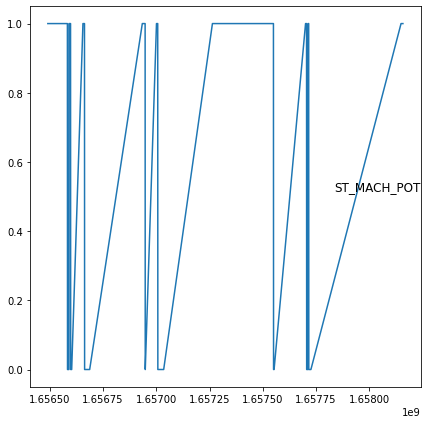

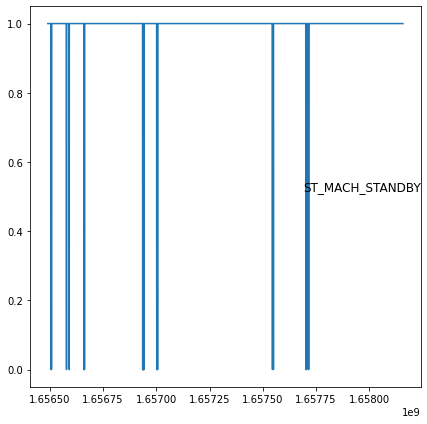

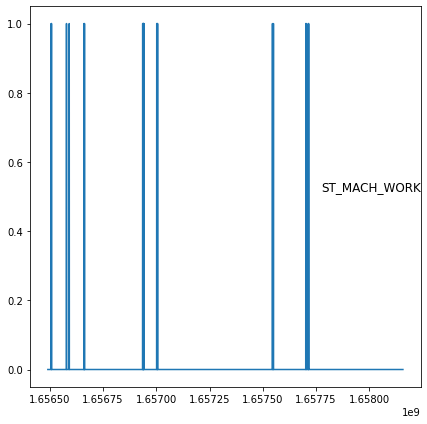

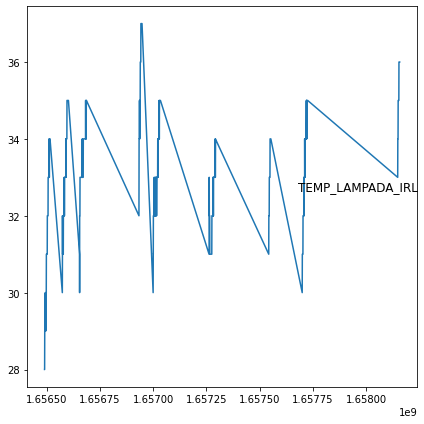

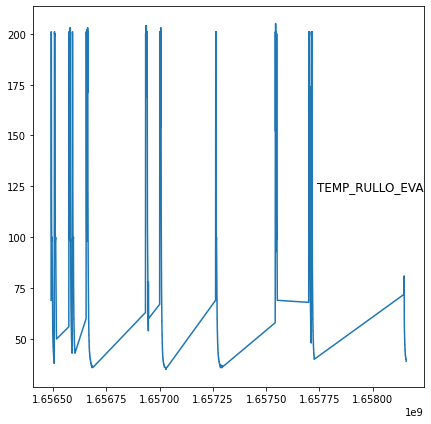

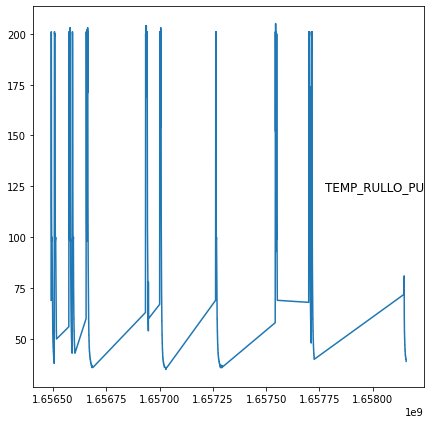

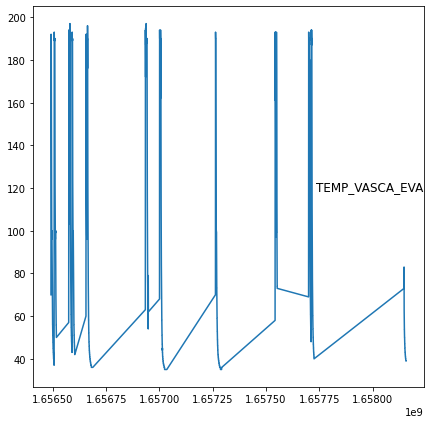

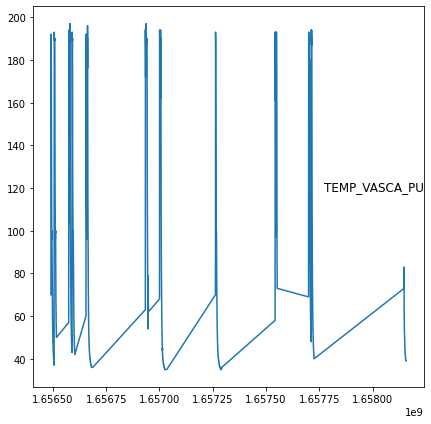

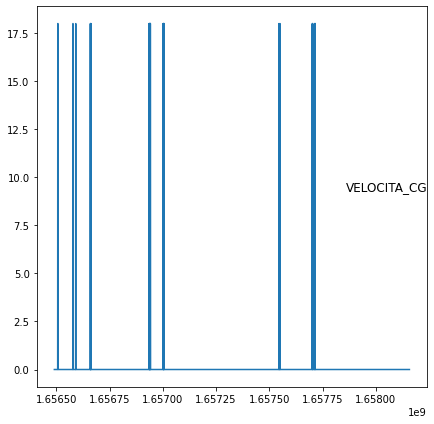

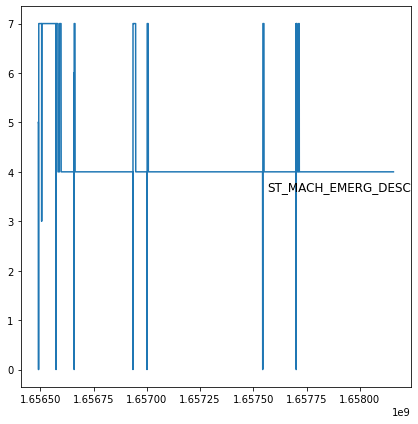

In [120]:
values = dataset.values
# plotto l'andamento nel tempo di ogni feature del dataset
columns = range(len(dataset.columns))
for col in columns:
    pyplot.figure(figsize=(7, 7))
    pyplot.plot(dataset.index.values, values[:, col])
    pyplot.title(dataset.columns[col], y=0.5, loc='right')
    pyplot.show()

In [121]:
# trasformo tutti i valori numerio in float
values = values.astype('float32')
values

array([[   0., 3148.,    0., ...,   70.,    0.,    5.],
       [   0., 3148.,    0., ...,   91.,    0.,    5.],
       [   0., 3148.,    0., ...,  109.,    0.,    0.],
       ...,
       [   0., 3621.,    0., ...,   39.,    0.,    4.],
       [   0., 3621.,    0., ...,   39.,    0.,    4.],
       [   0., 3621.,    0., ...,   39.,    0.,    4.]], dtype=float32)

In [122]:
# normalizzo tutti i dati in modo che siano tutti sullo stesso range
# x = (x - x_min)/(x_max-x_min)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled

array([[0.        , 0.        , 0.        , ..., 0.21604939, 0.        ,
        0.71428573],
       [0.        , 0.        , 0.        , ..., 0.34567904, 0.        ,
        0.71428573],
       [0.        , 0.        , 0.        , ..., 0.45679015, 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.02469136, 0.        ,
        0.5714286 ],
       [0.        , 1.        , 0.        , ..., 0.02469136, 0.        ,
        0.5714286 ],
       [0.        , 1.        , 0.        , ..., 0.02469136, 0.        ,
        0.5714286 ]], dtype=float32)

In [123]:
from numpy import unique

n_train_hours = len(scaled) - int(len(scaled) * 0.05)
train = scaled[:n_train_hours, :]
test = scaled[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(3213, 15) (3213,) (169, 15) (169,)
(3213, 15, 1) (3213,) (169, 15, 1) (169,)


Epoch 1/100
201/201 [==============================] - 1s 2ms/step - loss: 0.4327 - accuracy: 0.2770 - val_loss: 0.1145 - val_accuracy: 0.0000e+00
Epoch 2/100
201/201 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.3495 - val_loss: 0.0336 - val_accuracy: 0.0000e+00
Epoch 3/100
201/201 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.3511 - val_loss: 0.0312 - val_accuracy: 0.0000e+00
Epoch 4/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.3548 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 5/100
201/201 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.3545 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 6/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1582 - accuracy: 0.3554 - val_loss: 0.0148 - val_accuracy: 0.0000e+00
Epoch 7/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.3557 - val_loss: 0.011

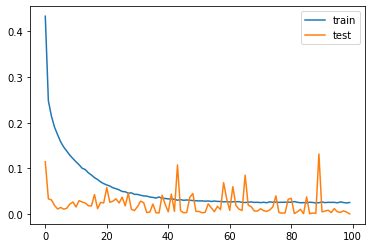

101/101 [==============================] - 0s 874us/step - loss: 0.0323 - accuracy: 0.3813
Loss: 0.03231406584382057  Accuracy: 0.3812636137008667


In [124]:
from keras.layers import MaxPooling1D, Flatten, Conv1D

model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(8, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
history = model.fit(train_X, train_y, batch_size=16, epochs=100, validation_data=(test_X, test_y), verbose=1)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

acc = model.evaluate(train_X, train_y)
print("Loss:", acc[0], " Accuracy:", acc[1])